In [ ]:
# clustering code works for solving, importing ML 9 coding

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


/Users/starlord/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['power', 'linalg', 'fft', 'random', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
data = pd.read_csv('/Users/starlord/Downloads/data_stocks.csv')

In [18]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [22]:
# Which stocks are apparently similiar in performance

In [46]:

data = data[pyrandom.sample(range(len(data)),len(data))]

In [51]:
figsize(10,10)
plot(data([:,0],data[:,8], 'b+')

SyntaxError: invalid syntax (<ipython-input-51-709449c52e6a>, line 2)

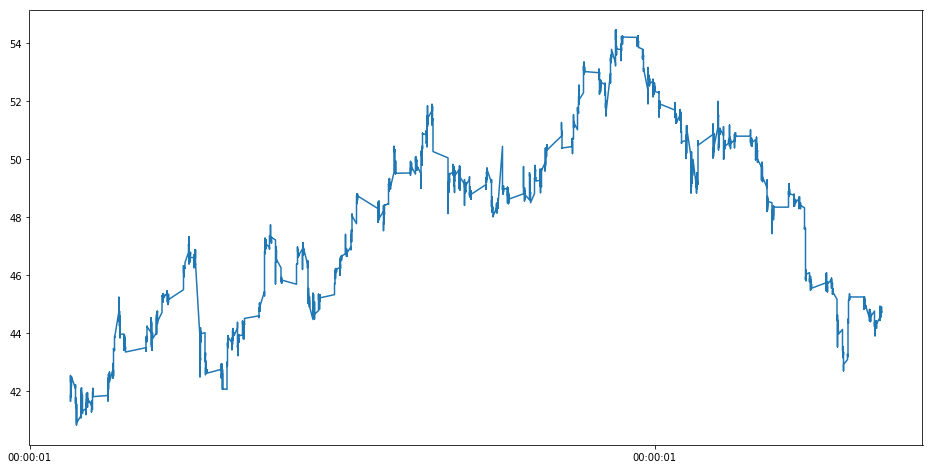

In [33]:
#setting index as date
data['DATE'] = pd.to_datetime(data.DATE,format='%Y-%m-%d')
data.index = data['DATE']

#plot
plt.figure(figsize=(16,8))
plt.plot(data['NASDAQ.AAL'], label='NASDAQ.ADBE')

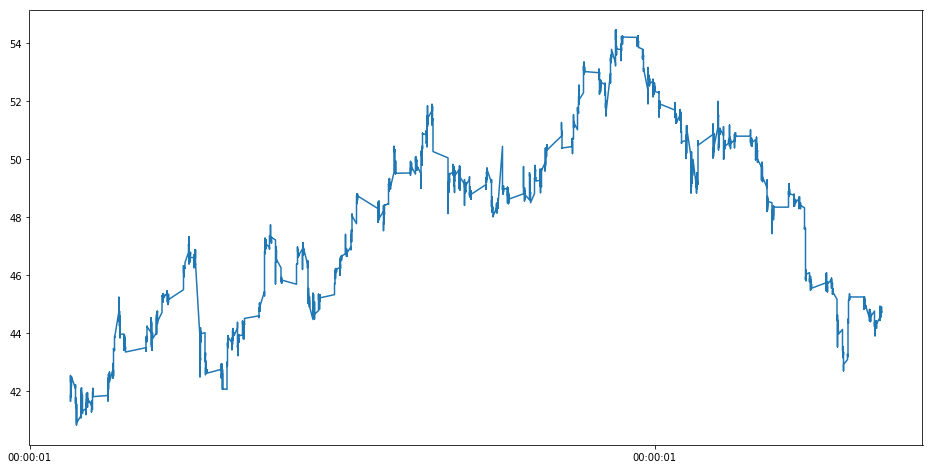

In [23]:
#setting index as date
data['DATE'] = pd.to_datetime(data.DATE,format='%Y-%m-%d')
data.index = data['DATE']

#plot
plt.figure(figsize=(16,8))
plt.plot(data['NASDAQ.AAL'], label='NASDAQ.ADBE')

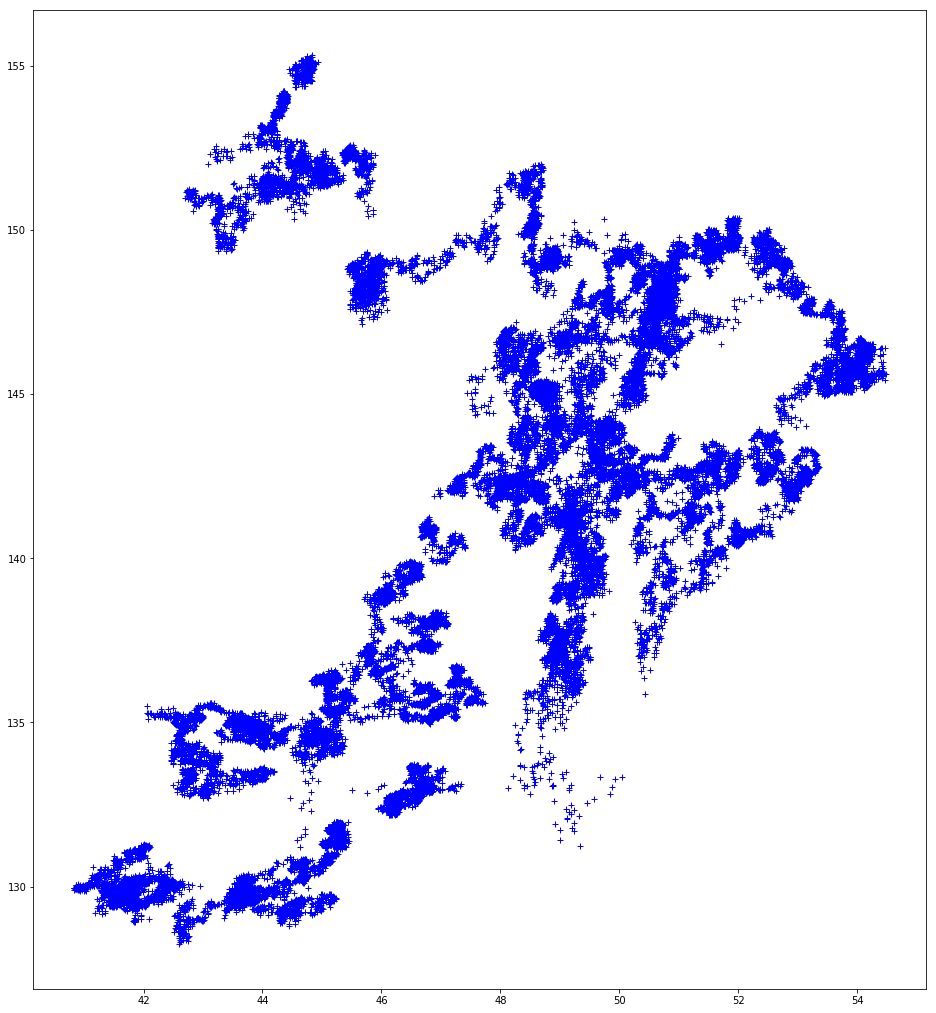

In [30]:
figsize(16,18)
plot(data['NASDAQ.AAL'],data['NASDAQ.ADBE'],'b+')

In [60]:
data = r_[10*randn(1000,2)+array([70,30]),
          10*randn(1000,2)+array([10,10]),
          10*randn(1000,2)+array([50,80])]
data = data[pyrandom.sample(range(len(data)),len(data))]

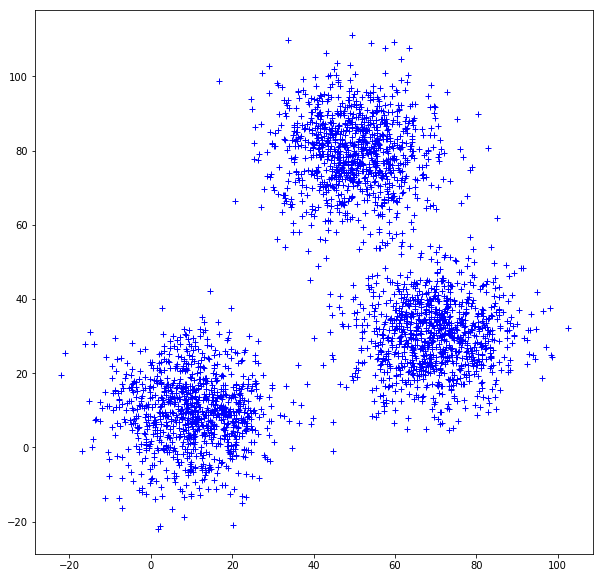

In [61]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')

In [62]:
# K-Means Algo
protos = array([[30,30],[40,20],[0,90],[50,50]])
start = protos.copy()

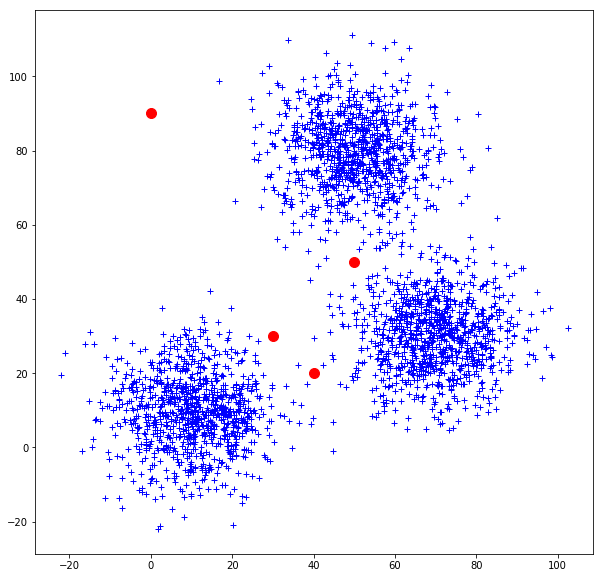

In [63]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
plot(protos[:,0],protos[:,1],'ro',markersize=10)

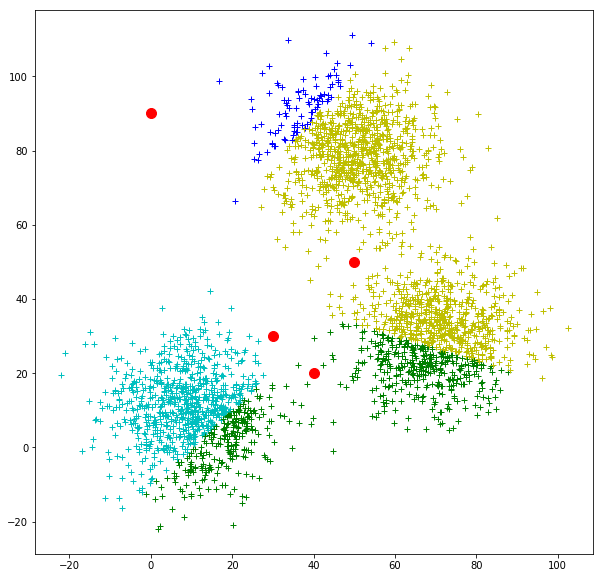

In [64]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
    plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [65]:
history = [protos.copy()]

for i in range(len(protos)):
    protos[i,:] = average(data[closest==i],axis=0)
    
history.append(protos.copy())

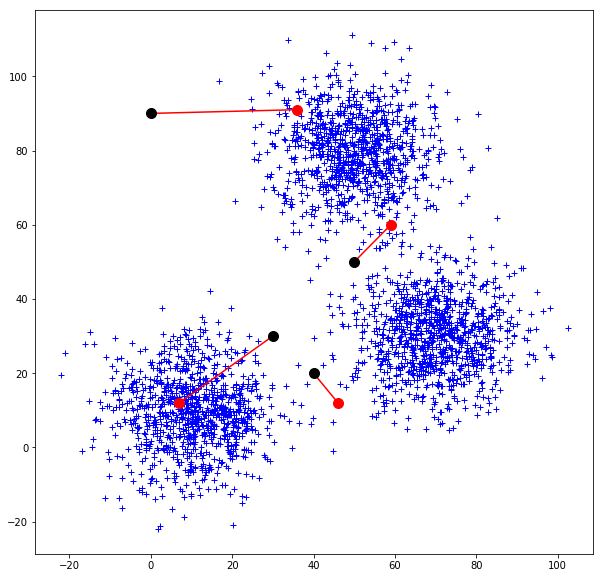

In [66]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0],harray[:,i,1],'r')
plot(harray[0,:,0],harray[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [67]:
for round in range(1000):
    if round%100==0: sys.stderr.write("%d "%round)
    dists = cdist(protos,data)
    closest = argmin(dists,axis=0)
    for i in range(len(protos)):
            protos[i,:] = average(data[closest==i],axis=0)
    history.append(protos.copy())

0 100 200 300 400 500 600 700 800 900 

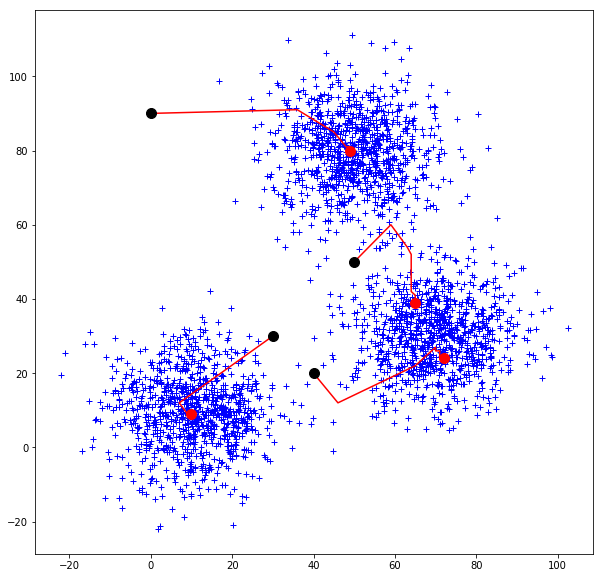

In [68]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0],history[:,i,1],'r')
plot(history[0,:,0],history[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

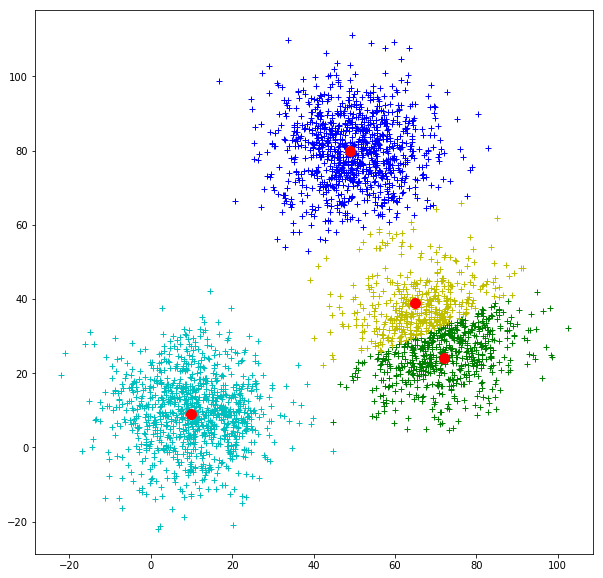

In [69]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
  plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [70]:
# hirerchical clustering

import random as pyrandom
from scipy.spatial.distance import cdist
figsize(6,6)

In [71]:
ccolors = ['go', 'ro','bo','mo','co','yo']
def plotclusters(data,centers=None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0],data[:,1],'bo',markersize=5)
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0],data[centers==i,1],ccolors[i%len(ccolors)],markersize=5)

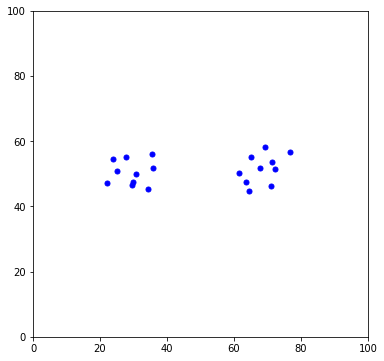

In [72]:
# A Simple Clustering Problem
data = r_[4*randn(10,2)+array([70,50]),
          4*randn(10,2)+array([30,50])]
# shuffle(data)
plotclusters(data)

In [73]:
from scipy.spatial.distance import cdist
ds = cdist(data,data)

In [74]:
from scipy.cluster.hierarchy import *
lm = linkage(ds,"single")
lm[:5]

/Users/starlord/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


array([[17.        , 19.        ,  2.52039039,  2.        ],
       [ 1.        ,  7.        ,  5.9042989 ,  2.        ],
       [12.        , 20.        ,  7.15137744,  3.        ],
       [ 8.        ,  9.        ,  7.99422575,  2.        ],
       [10.        , 18.        ,  9.53574511,  2.        ]])

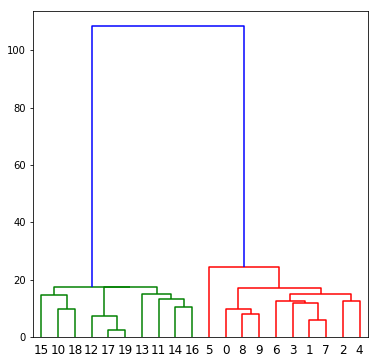

In [75]:
_=dendrogram(lm)

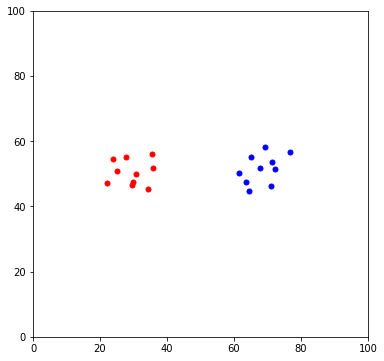

In [76]:
plotclusters(data,fcluster(lm,2,criterion='maxclust'))

In [77]:
# linkage method

data = r_[dot(randn(100,2),diag([4,10]))+array([60,60]),
           dot(randn(100,2),diag([4,10]))+array([40,40])]
shuffle(data)


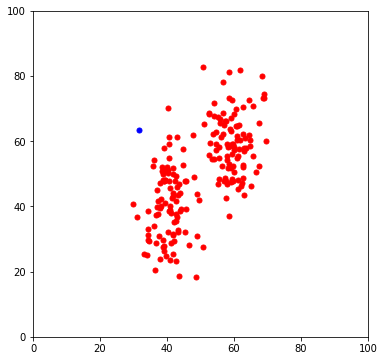

In [78]:
assignment = fclusterdata(data,2,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

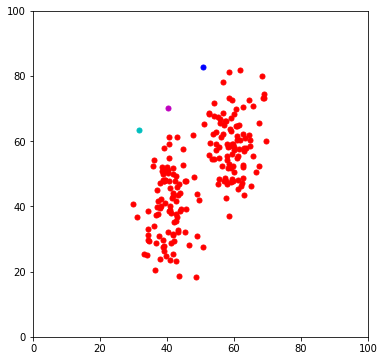

In [79]:
assignment = fclusterdata(data,4,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

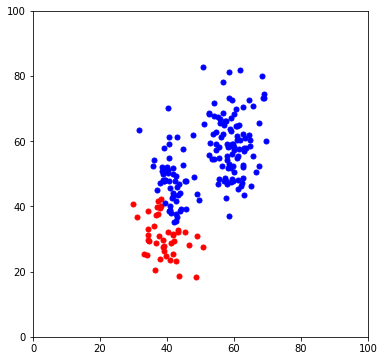

In [80]:
assignment = fclusterdata(data,2,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

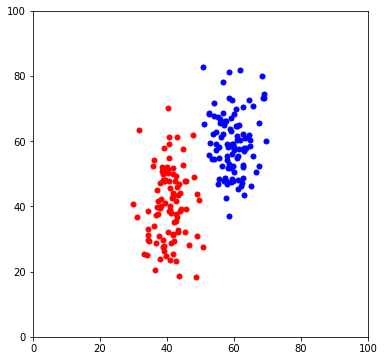

In [81]:
# Average linkage

assignment = fclusterdata(data,2,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

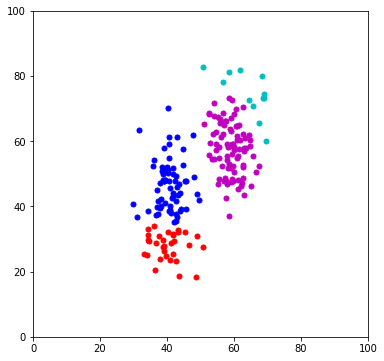

In [82]:
assignment = fclusterdata(data,4,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

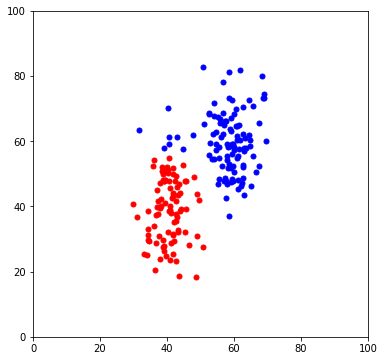

In [83]:
# Centroid linkage

lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

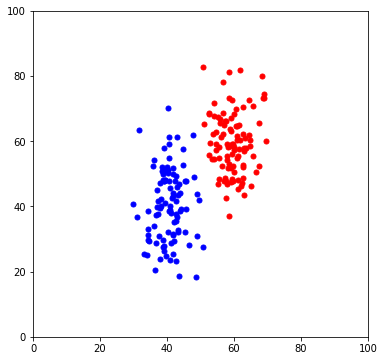

In [84]:
# Ward linkage
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)
